In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Dataset

 Bock, R. (2004). MAGIC Gamma Telescope [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [ ]:
# Table Preview
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv("magic04.data", names=cols)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
# Rename class to 0 or 1
df['class'] = (df['class'] == 'g').astype(int)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


from matplotlib import pyplot as plt
df['fLength'].plot(kind='hist', bins=20, title='fLength')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['fWidth'].plot(kind='hist', bins=20, title='fWidth')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['fSize'].plot(kind='hist', bins=20, title='fSize')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['fConc'].plot(kind='hist', bins=20, title='fConc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='fLength', y='fWidth', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='fWidth', y='fSize', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='fSize', y='fConc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='fConc', y='fConc1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['fLength'].plot(kind='line', figsize=(8, 4), title='fLength')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['fWidth'].plot(kind='line', figsize=(8, 4), title='fWidth')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['fSize'].plot(kind='line', figsize=(8, 4), title='fSize')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['fConc'].plot(kind='line', figsize=(8, 4), title='fConc')
plt.gca().spines[['top', 'right']].set_visible(False)

# Plotting The Source Database

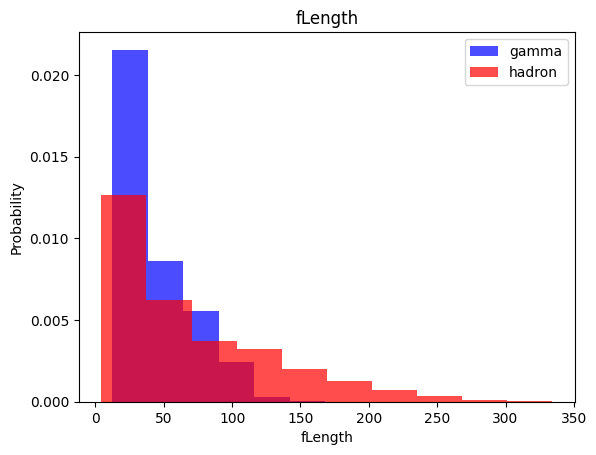

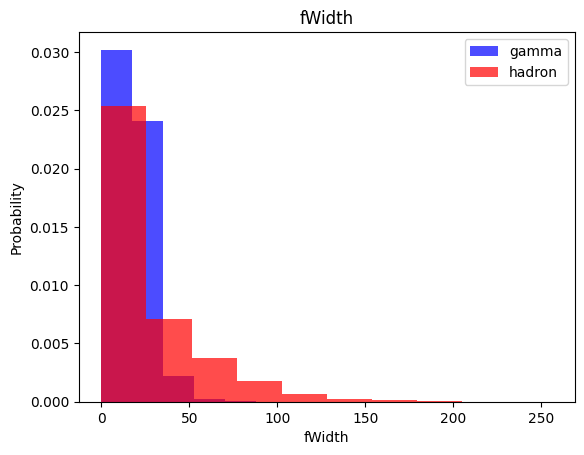

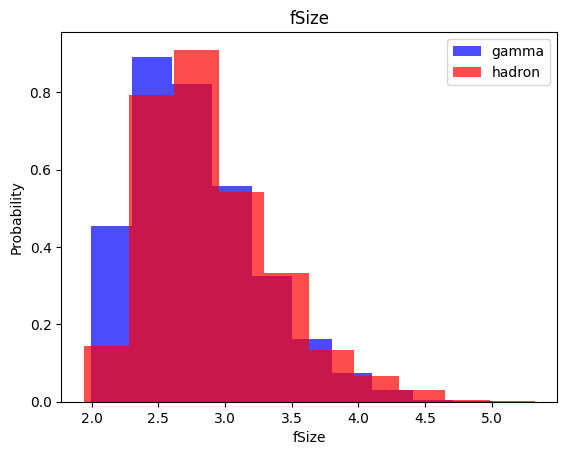

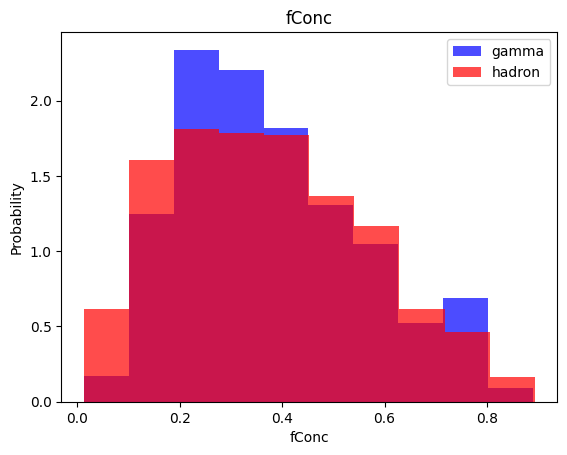

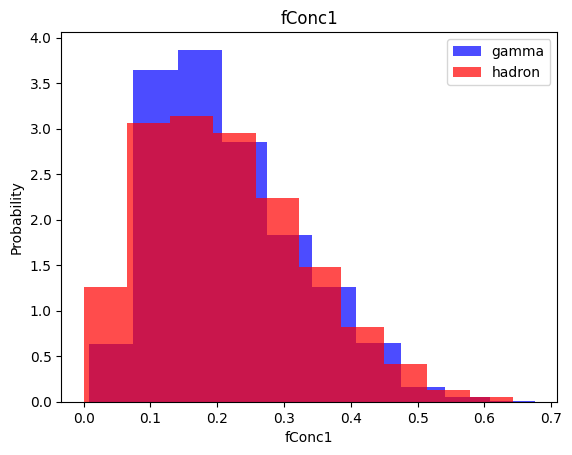

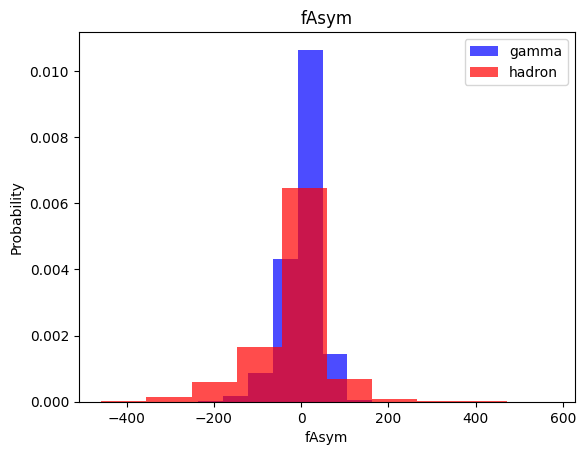

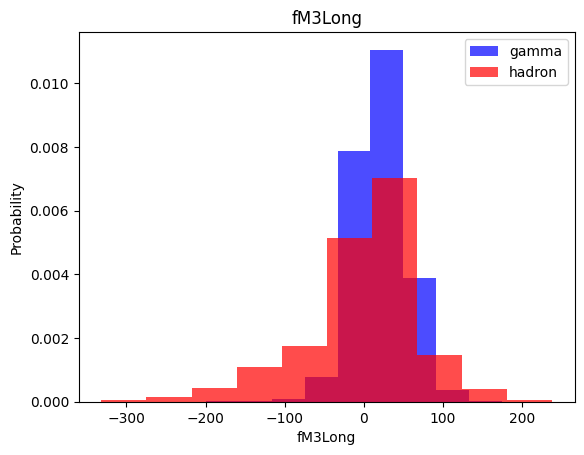

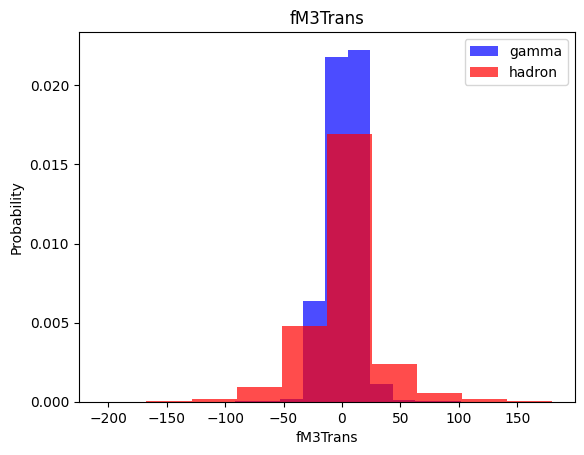

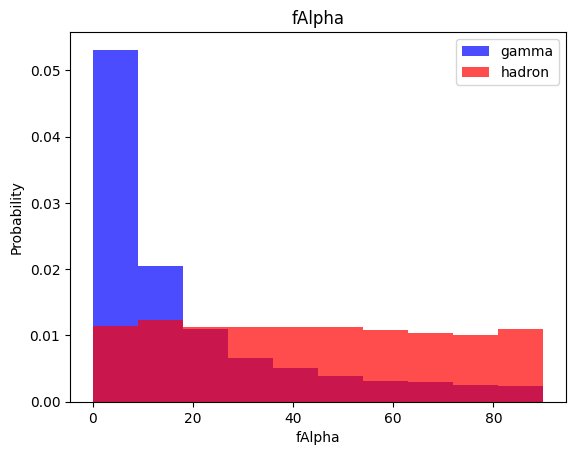

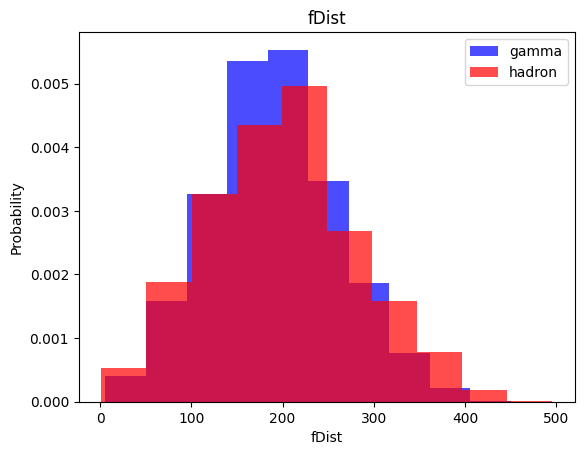

In [ ]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
    plt.hist(df[df['class']==0][label], color = 'red', label = 'hadron', alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, valid, and test datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


`df.sample(frac=1)`:

- Randomly shuffles the rows of the DataFrame df.
- frac=1 means all rows are included in the shuffle.
- This is done to randomize the data before splitting, ensuring each subset (train, valid, test) is representative of the whole dataset.

`np.split()`:
- Splits the shuffled DataFrame into multiple parts based on the indices specified in the second argument.

`[int(0.6*len(df)), int(0.8*len(df))]`:
- These are the indices at which the DataFrame is split:
 - int(0.6*len(df)): 60% of the total length of df.
 - int(0.8*len(df)): 80% of the total length of df.
- The split points divide the dataset into:
 - First 60% → train
 - Next 20% (from 60% to 80%) → valid
 - Last 20% (from 80% to 100%) → test

Assigning to train, valid, test:
- train: Used to train the model. Contains the first 60% of the shuffled data.
- valid: Used for hyperparameter tuning or validation. Contains the next 20% of the shuffled data.
- test: Used to evaluate the model’s performance on unseen data. Contains the last 20% of the shuffled data.

# Allow Oversampling Data

In [ ]:
def scale_dataset(data, oversample=False):
    # Check if input is a DataFrame or NumPy array
    if isinstance(data, pd.DataFrame):
        X = data[data.columns[:-1]].values
        y = data[data.columns[-1]].values
    elif isinstance(data, np.ndarray):
        X = data[:, :-1]
        y = data[:, -1]
    else:
        raise ValueError("Input must be a Pandas DataFrame or a NumPy array.")

    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Apply oversampling if specified
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    # Combine features and target into a single array
    data_combined = np.hstack((X, y.reshape(-1, 1)))

    return data_combined, X, y

## What the Function Does:
1. Feature Scaling: Standardizes the feature columns to have mean 0 and standard deviation 1.
2. Optional Oversampling: Balances the target classes using random oversampling.
3. Data Preparation: Prepares the dataset for machine learning tasks by ensuring features are scaled and optionally balanced.

In [ ]:
# Apply the scaler function.
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

print("X_train, Y_train: ", X_train.shape, y_train.shape)
print("X_valid, Y_valid: ", X_valid.shape, y_valid.shape)
print("X_test, Y_test: ", X_test.shape, y_test.shape)

X_train, Y_train:  (14758, 10) (14758,)
X_valid, Y_valid:  (3804, 10) (3804,)
X_test, Y_test:  (3804, 10) (3804,)


# Model 1: k-Nearest Neighbor
k-Nearest Neighbor (k-NN) is a classification algorithm that predicts the class of a data point by finding the k closest points (neighbors) in the training data and assigning the most common class among them. It uses distance measures (e.g., Euclidean distance) to determine proximity, making it simple and effective for small datasets.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74      1320
         1.0       0.87      0.83      0.85      2484

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.80      3804
weighted avg       0.82      0.81      0.81      3804



# Model 2: Naive Bayes
Naive Bayes is a classification algorithm that predicts the probability of a data point belonging to a certain class based on the **Bayes Theorem.**



## More about Bayes' Theorem
Imagine you have a bag of marbles. Some are red, and some are blue. You want to know the probability of picking a red marble. Bayes' theorem helps you update your belief about this probability as you get new information.

Here's the basic idea:

  - **Prior**: You start with an initial guess about the probability of picking a red marble (e.g., you might think it's 50/50). This is called the prior probability.

  - **Evidence**: You then pick a marble without looking and feel that it's smooth. You know that red marbles are usually smooth, while blue marbles are usually rough. This new information is called the evidence.

  - **Likelihood**: You consider how likely it is to feel a smooth marble if it's actually red (this is high) and how likely it is to feel a smooth marble if it's actually blue (this is low). This is called the likelihood.

  - **Posterior**: Using Bayes' theorem, you combine your prior probability, the evidence, and the likelihood to update your belief about the probability of the marble being red. This updated belief is called the posterior probability.

In simpler terms, Bayes' theorem helps you adjust your initial guess based on new evidence.

Here's a formula that represents Bayes' theorem:

``` Posterior = (likelihood * prior) / evidence ```

``` P(A|B) = [P(B|A) * P(A)] / P(B) ```

Where:
  - `P(A|B)` is the posterior probability of event A happening given that event B has occurred.
  - `P(B|A)` is the likelihood of event B happening given that event A has occurred.
  - `P(A)` is the prior probability of event A happening.
  - `P(B)` is the prior probability of event B happening.

Example:

Let's say you have a bag with 10 marbles: 6 red and 4 blue. You pick a marble without looking and find that it's smooth.

  - **Prior**: The prior probability of picking a red marble is 6/10 = 0.6.
  - **Evidence**: The evidence is that the marble is smooth.
  - **Likelihood**: Let's assume that 90% of red marbles are smooth, and 10% of blue marbles are smooth.
  - **Posterior**: Using Bayes' theorem, you can calculate the updated probability of the marble being red given that it's smooth.

## Applying with Sklearn

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.47      0.54      1320
         1.0       0.75      0.87      0.81      2484

    accuracy                           0.73      3804
   macro avg       0.70      0.67      0.67      3804
weighted avg       0.72      0.73      0.71      3804



# Model 3: Logistic Regression

Logistic Regression is a classification algorithm that predicts the probability of a data point belonging to a specific class by modeling the relationship between input features and the target using a **logistic (sigmoid) function**. It outputs probabilities between 0 and 1, and assigns the class based on a chosen threshold (commonly 0.5).



## The Logistic (Sigmoid) Function

Imagine you want to predict whether a student will pass or fail an exam based on the number of hours they studied. Now, here's where the logistic (sigmoid) function comes in. It's like a special ingredient that transforms the student's study hours into a probability score. Think of it as a bridge connecting the input (study hours) to the output (probability of passing).

<div class="math">
\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}}
\end{equation}
</div>

**How Does It Work?**

- **Input**: You feed the student's study hours into the logistic function.
- **Transformation**: The logistic function works its magic, squeezing the study hours into a number between 0 and 1.
- **Output**: This number represents the probability of the student passing the exam.

**The Shape of the Sigmoid**

Logistic-curve.svg

The logistic (sigmoid) function has a characteristic "S" shape. It starts low, gradually increases, and then levels off near 1. This shape is what makes it perfect for predicting probabilities:

- **Low Input**: If the student studies very little, the probability of passing is close to 0.
- **Medium Input**: As study hours increase, the probability rises steadily.
- **High Input**: If the student studies a lot, the probability gets close to 1, indicating a high chance of passing.

## Applying with Sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70      1320
         1.0       0.87      0.77      0.81      2484

    accuracy                           0.77      3804
   macro avg       0.75      0.77      0.76      3804
weighted avg       0.79      0.77      0.77      3804



# Model 4: Support Vector Machine

Support Vector Machine (SVM) is a classification algorithm that finds the best boundary (hyperplane) to separate data points from different classes. It maximizes the margin between the boundary and the closest points (support vectors) to ensure robust and accurate classification.

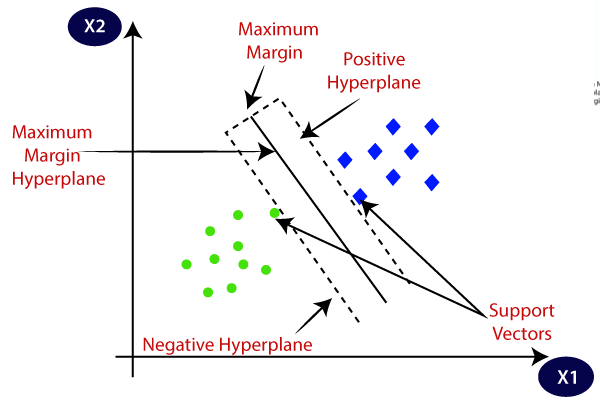

To find the hyperplane that separates different classes in a Support Vector Machine (SVM):

- Imagine the hyperplane as a line (in 2D) or a flat surface (in 3D) that splits the space into two parts, with one class on each side.
- SVM finds the hyperplane by ensuring it is positioned so that the gap (margin) between the closest points of each class (called support vectors) is as wide as possible. This way, the boundary is as far from both classes as possible, making the separation clear and minimizing errors.







## Applying with Sklearn

In [ ]:
from sklearn.svm import SVC # short for Support Vector Classifier
from sklearn.metrics import classification_report

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.84      0.79      1320
         1.0       0.91      0.85      0.88      2484

    accuracy                           0.84      3804
   macro avg       0.83      0.84      0.83      3804
weighted avg       0.85      0.84      0.85      3804

